# **Imports**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df_raw = pd.read_csv("C:/Users/ojime/OneDrive/Desktop/Datasets/breakexp2022.csv")

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17654 entries, 0 to 17653
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           17654 non-null  int64  
 1   Time           17654 non-null  int64  
 2   Doc_No         17654 non-null  int64  
 3   Seq_No         17654 non-null  int64  
 4   Tray_No        17654 non-null  int64  
 5   Oper_Num       17654 non-null  int64  
 6   Dept_Num       17654 non-null  int64  
 7   Dept_Name      17654 non-null  object 
 8   Machine_Num    17654 non-null  int64  
 9   Machine_Name   17654 non-null  object 
 10  Reas_Num       17654 non-null  int64  
 11  Reas_Name      17654 non-null  object 
 12  Eye_Broken     17654 non-null  int64  
 13  Oper_Machine   17654 non-null  object 
 14  Vendor         17654 non-null  int64  
 15  Vendor Name    17654 non-null  object 
 16  Material       17654 non-null  int64  
 17  Material Desc  17654 non-null  object 
 18  LensTy

In [10]:
df_raw['Reas_Name'].nunique()

190

In [12]:
df_raw['Machine_Name'].nunique()

21

In [9]:
df_raw.shape

(17654, 40)

# **Cleaning**

In [5]:
df_raw.head()

,Date,Time,Doc_No,Seq_No,Tray_No,Oper_Num,Dept_Num,Dept_Name,Machine_Num,Machine_Name,...,Frame_A,Frame_B,Frame_ED,Frame_DBL,Frame_Price,Frame_Cost,Cust_Code,Error_Type,User,Cost_Extra
0,20220104,10354658,1199550,0,6896,1,5,ALL,1,DC,...,0.0,0.0,0.0,0.0,0,0,125,I,JN,0
1,20220104,10371438,1199219,1,1285,1,5,ALL,1,DC,...,0.0,0.0,0.0,0.0,0,0,120,I,JN,0
2,20220104,10375493,1199696,0,1329,1,5,ALL,1,DC,...,0.0,0.0,0.0,0.0,0,0,111,I,JN,0
3,20220104,10375493,1199696,1,1329,1,5,ALL,1,DC,...,0.0,0.0,0.0,0.0,0,0,111,I,JN,0
4,20220104,10425696,1199893,0,2071,1,5,ALL,1,DC,...,0.0,0.0,0.0,0.0,0,0,117,I,JN,0


In [6]:
df_raw.tail()

,Date,Time,Doc_No,Seq_No,Tray_No,Oper_Num,Dept_Num,Dept_Name,Machine_Num,Machine_Name,...,Frame_A,Frame_B,Frame_ED,Frame_DBL,Frame_Price,Frame_Cost,Cust_Code,Error_Type,User,Cost_Extra
17649,20221231,10175037,1254010,1,6620,4,5,ALL,12,finished edgers,...,0.0,0.0,0.0,0.0,0,0,102,I,TY,0
17650,20221231,10181813,1253531,0,2844,4,5,ALL,17,TINT UNIT,...,0.0,0.0,0.0,0.0,0,0,118,I,TY,0
17651,20221231,10181813,1253531,1,2844,4,5,ALL,17,TINT UNIT,...,0.0,0.0,0.0,0.0,0,0,118,I,TY,0
17652,20221231,10191705,1254454,0,2731,4,5,ALL,12,finished edgers,...,0.0,0.0,0.0,0.0,0,0,108,I,TY,0
17653,20221231,10191705,1254454,1,2731,4,5,ALL,12,finished edgers,...,0.0,0.0,0.0,0.0,0,0,108,I,TY,0


**As we can see, this dataset is very messy and has many unused, repeated, or irrelevant columns; therefore, we will drop these unnecessary columns to have a cleaner workspace.**

In [7]:
df = df_raw.drop(['Doc_No', 'Dept_Name', 'Dept_Num','Seq_No', 'Tray_No', 'Vendor', 'Vendor Name', 'Material', 'LensType', 'Color','BC', 'AddPower', 'Sphere',
         'Cylinder', 'Blank', 'Frame_SKU', 'Frame_A', 'Frame_B','Frame_ED', 'Frame_DBL', 'Cust_Code', 'Error_Type','Lens_Price','Frame_Price', 'Frame_Cost', 
'Cost_Extra'], axis=1)

**The result is a much cleaner dataset.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17654 entries, 0 to 17653
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           17654 non-null  int64  
 1   Time           17654 non-null  int64  
 2   Oper_Num       17654 non-null  int64  
 3   Machine_Num    17654 non-null  int64  
 4   Machine_Name   17654 non-null  object 
 5   Reas_Num       17654 non-null  int64  
 6   Reas_Name      17654 non-null  object 
 7   Eye_Broken     17654 non-null  int64  
 8   Oper_Machine   17654 non-null  object 
 9   Material Desc  17654 non-null  object 
 10  LensType Desc  17654 non-null  object 
 11  Color Desc     17654 non-null  object 
 12  Lens_Cost      17654 non-null  float64
 13  User           17654 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 1.9+ MB


In [9]:
df.head()

,Date,Time,Oper_Num,Machine_Num,Machine_Name,Reas_Num,Reas_Name,Eye_Broken,Oper_Machine,Material Desc,LensType Desc,Color Desc,Lens_Cost,User
0,20220104,10354658,1,1,DC,135,Rosin A/R breakage,1,M,TRIVEX,CBW,FACTORY,17.26,JN
1,20220104,10371438,1,1,DC,135,Rosin A/R breakage,2,M,TRIVEX,SV,FACTORY,13.26,JN
2,20220104,10375493,1,1,DC,135,Rosin A/R breakage,1,M,POLY,S,HARDCOAT,4.42,JN
3,20220104,10375493,1,1,DC,135,Rosin A/R breakage,2,M,POLY,S,HARDCOAT,4.42,JN
4,20220104,10425696,1,1,DC,18,wrong trans color,1,M,TRIVEX,CBW,TRANS,7.50,JN


In [10]:
df.tail()

,Date,Time,Oper_Num,Machine_Num,Machine_Name,Reas_Num,Reas_Name,Eye_Broken,Oper_Machine,Material Desc,LensType Desc,Color Desc,Lens_Cost,User
17649,20221231,10175037,4,12,finished edgers,142,scratch edging W/AR,2,M,PL,CBW,FACTORY,29.50,TY
17650,20221231,10181813,4,17,TINT UNIT,158,blotchy tint,1,M,TRIVEX,CBW,FACTORY,17.26,TY
17651,20221231,10181813,4,17,TINT UNIT,158,blotchy tint,2,M,TRIVEX,CBW,FACTORY,17.26,TY
17652,20221231,10191705,4,12,finished edgers,142,scratch edging W/AR,1,M,PL,S,BLUE,0.00,TY
17653,20221231,10191705,4,12,finished edgers,142,scratch edging W/AR,2,M,PL,S,BLUE,0.00,TY


**Let's check for any null values in the dataset.**

In [11]:
df.isnull().values.any()

False

# **Exploratory analysis: Breakage reason and origin**

**Since our focus is breakages, we will look at the machines with the most breakages and the reasons for most breakages.**

In [12]:
df['Machine_Name'].value_counts().head()

finished edgers    5215
DC               4796
poly coater        1996
ORBIT GEN          1856
A/R lab            1523
Name: Machine_Name, dtype: int64

In [13]:
df['Machine_Name'].nunique()

21

In [14]:
df['Reas_Name'].value_counts().head()

defective lens front    2334
Scratch edging w/oAR    2118
pits                    1462
Rosin A/R breakage       997
poor coating issue       824
Name: Reas_Name, dtype: int64

In [15]:
df['Reas_Name'].nunique()

190

In [16]:
df[df['Machine_Name'] == 'poly coater']['Reas_Name'].value_counts()

pits                    1462
bad hard coating         328
Wavy                     123
DRIP on lens              38
overspray on lens         13
coated no coat lens        7
Double coated              7
suction cup markson        6
no hard coat scratch       5
didn't cure lens           3
low coat/wagon wheel       2
FINGER PRINTS              1
dropped lens               1
Name: Reas_Name, dtype: int64

**For a better presentation, use Seaborn to create visuals of "Machine_Name" and "Reas_Name" data.**

<AxesSubplot:xlabel='count', ylabel='Machine_Name'>

C:\Users\ojime\Documents\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


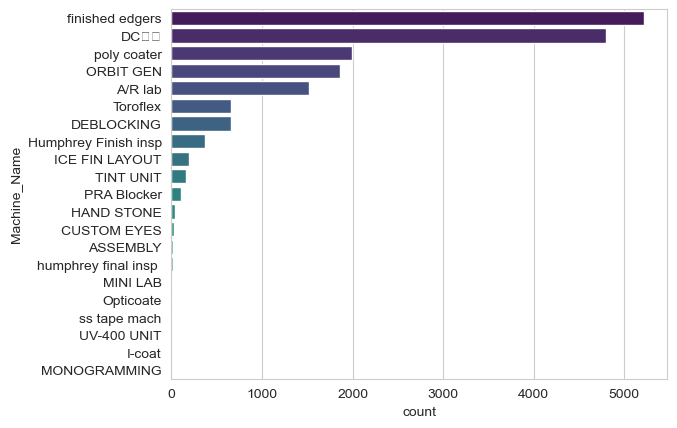

In [17]:
sns.countplot(y="Machine_Name", data=df, order=df.Machine_Name.value_counts().iloc[:].index, palette='viridis')

<AxesSubplot:xlabel='count', ylabel='Reas_Name'>

C:\Users\ojime\Documents\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


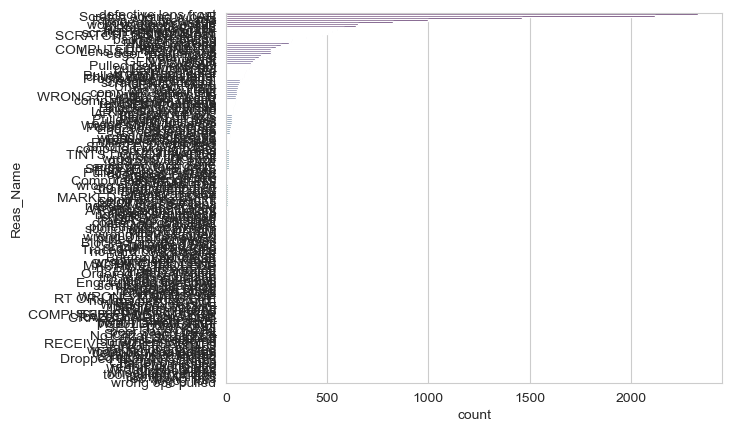

In [18]:
sns.countplot(y="Reas_Name", data=df, order=df.Reas_Name.value_counts().iloc[:].index, palette='viridis')

**As we can see, the "Reas_name" graph above is extremely messy. Therefore, only breakage reasons with significant occurrences will be displayed.**

In [19]:
df['Reas_Name'].value_counts().head(21)

defective lens front    2334
Scratch edging w/oAR    2118
pits                    1462
Rosin A/R breakage       997
poor coating issue       824
worn pad/poor polish     650
Scratched lens           644
A/R coating Craze        582
file hole wrong dir      550
scratch edging W/AR      526
Edged Small              505
SCRATCHED SINZING IT     473
AR scratched             397
bad hard coating         328
rings on lenses          322
No Engraving             310
lens missing             274
Engraving Pits           247
COMPUTED WRONG RX        224
Lens SLIPPED offaxis     223
edger malfunction        220
Name: Reas_Name, dtype: int64

**By looking at the value count for each reason, we can set a threshold on a specific number; in this case, we will set it at around 200 which is roughly 10% of the highest value count.**

<AxesSubplot:xlabel='count', ylabel='Reas_Name'>

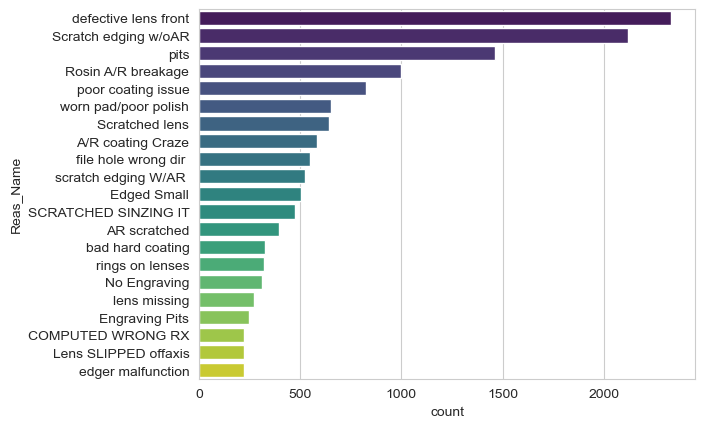

In [20]:
sns.countplot(y="Reas_Name", data=df, order=df.Reas_Name.value_counts().iloc[:21].index,palette='viridis')

# **Exploratory analysis: Categories**

**After the previous visualization, we found that the Machine/Department 'finished edgers' has the highest breakage count. Next, we will define each category's variables in the plot.**

In [21]:
FE = df[df['Machine_Name'] == 'finished edgers']['Reas_Name'] 
DCC = df[df['Machine_Name'] == 'DC']['Reas_Name']
PC = df[df['Machine_Name'] == 'poly coater']['Reas_Name']
OG = df[df['Machine_Name'] == 'ORBIT GEN']['Reas_Name']

**We plot each of the newly created variables.**

Text(0.5, 1.0, 'FE')

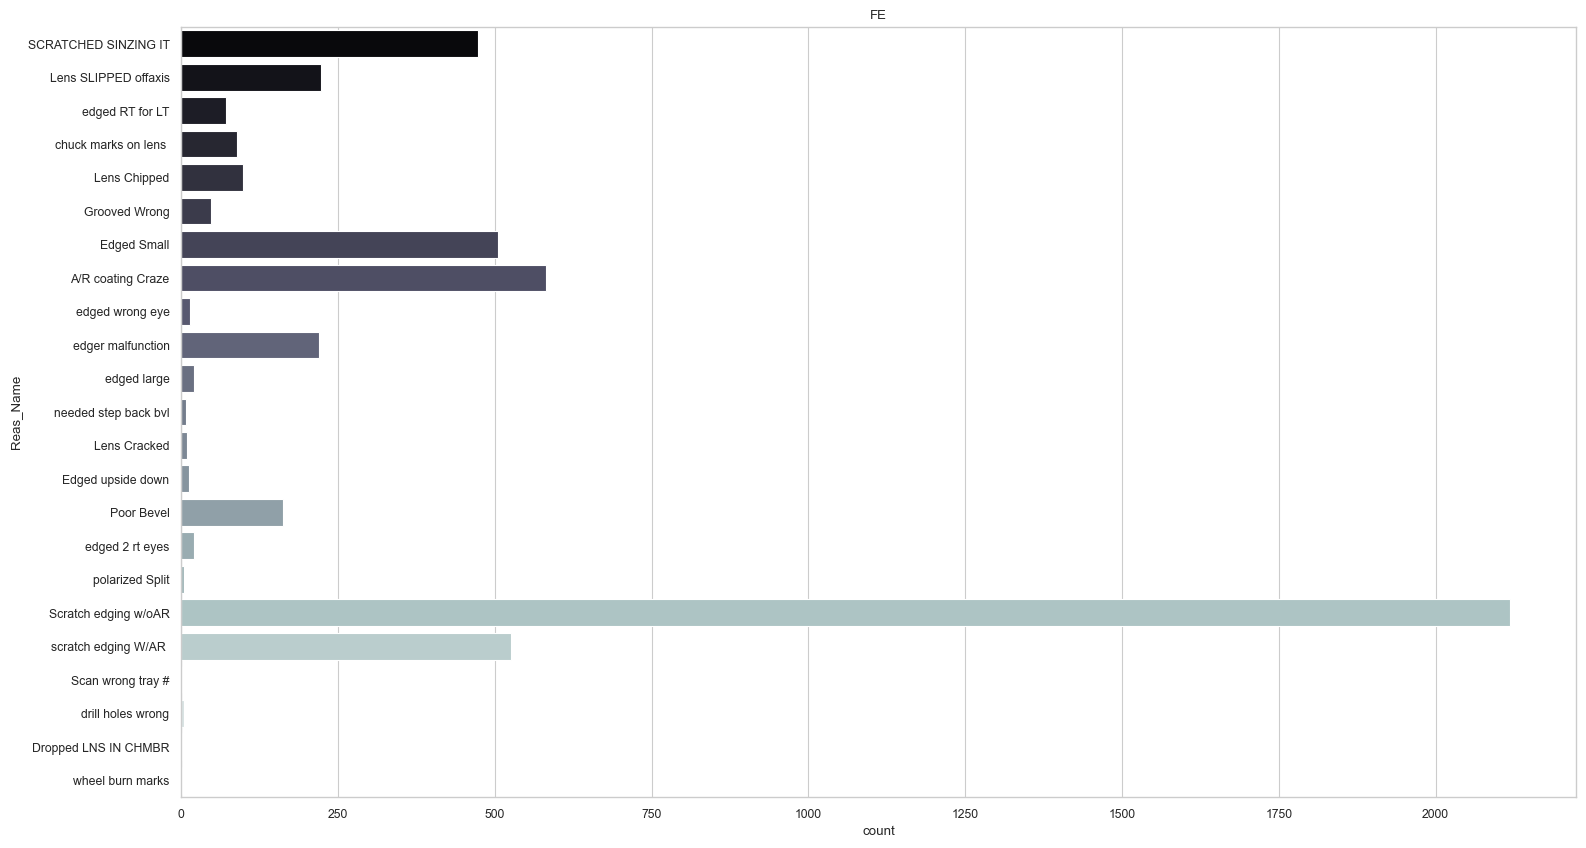

In [45]:
sns.set_context('paper',font_scale=1)
plt.figure(figsize=(18,10))
sns.countplot(y=FE,data=df,palette='bone')
plt.title('FE')

Text(0.5, 1.0, 'DC\x7f\x7f')

C:\Users\ojime\Documents\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


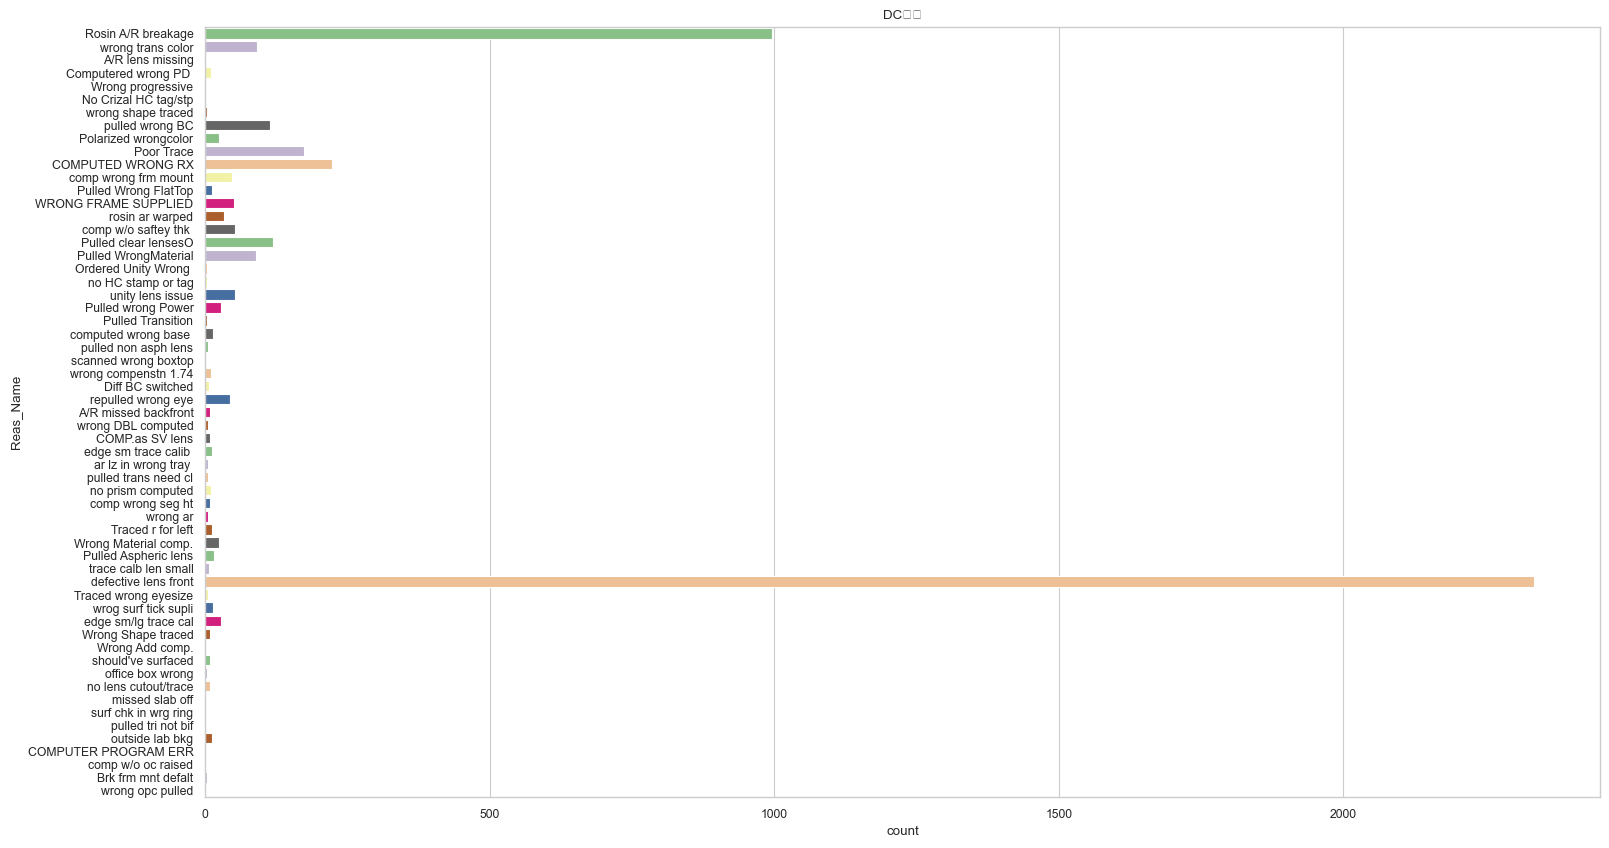

In [47]:
sns.set_context('paper',font_scale=1)
plt.figure(figsize=(18,10))
sns.countplot(y=DCC,data=df,palette='Accent')
plt.title('DC')

Text(0.5, 1.0, 'Poly Coater')

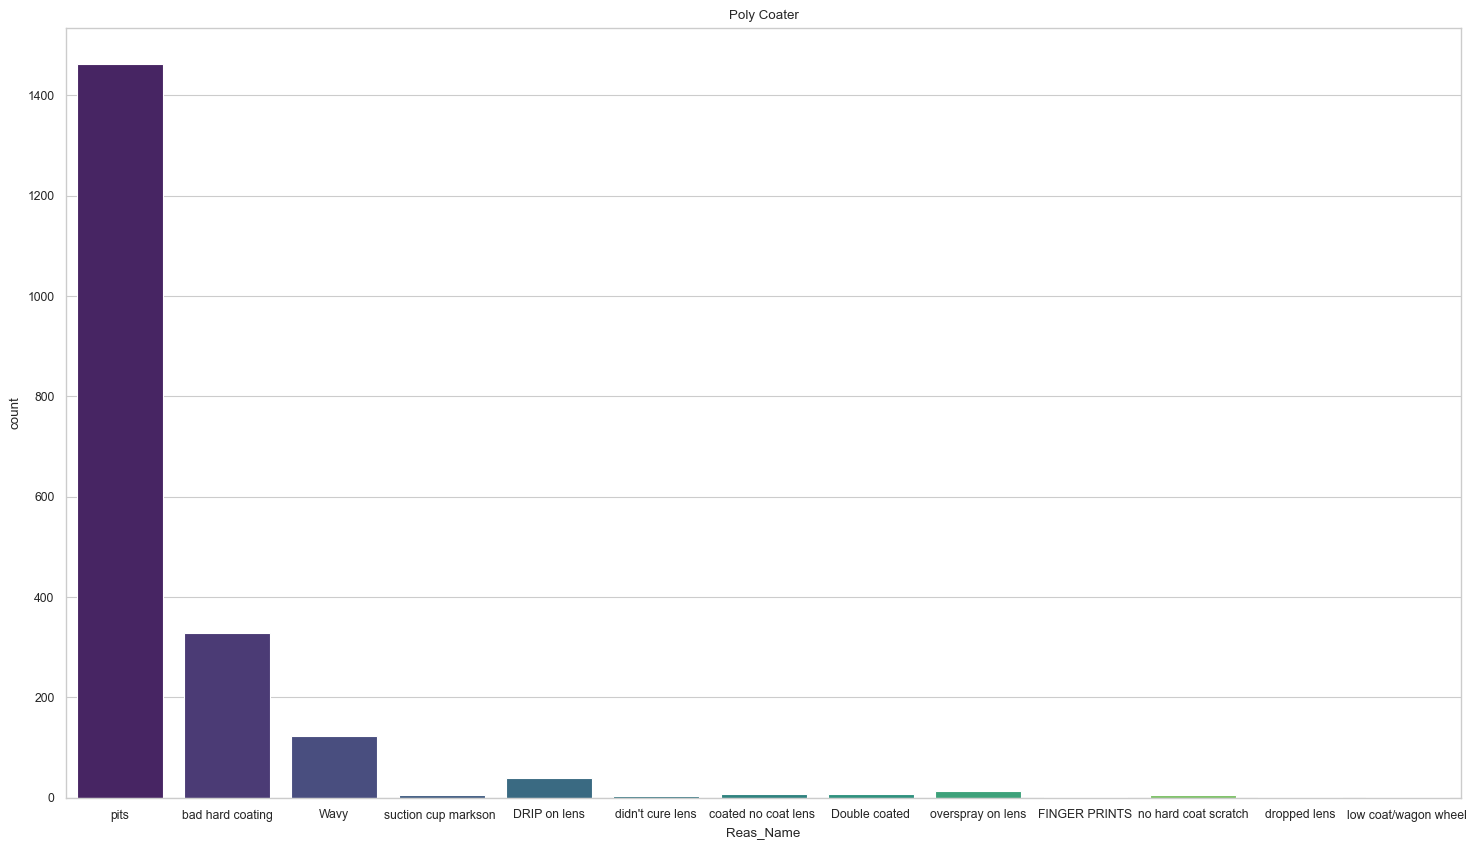

In [24]:
sns.set_context('paper',font_scale=1)
plt.figure(figsize=(18,10))
sns.countplot(x=PC,data=df,palette='viridis')
plt.title('Poly Coater')

Text(0.5, 1.0, 'ORBIT GEN')

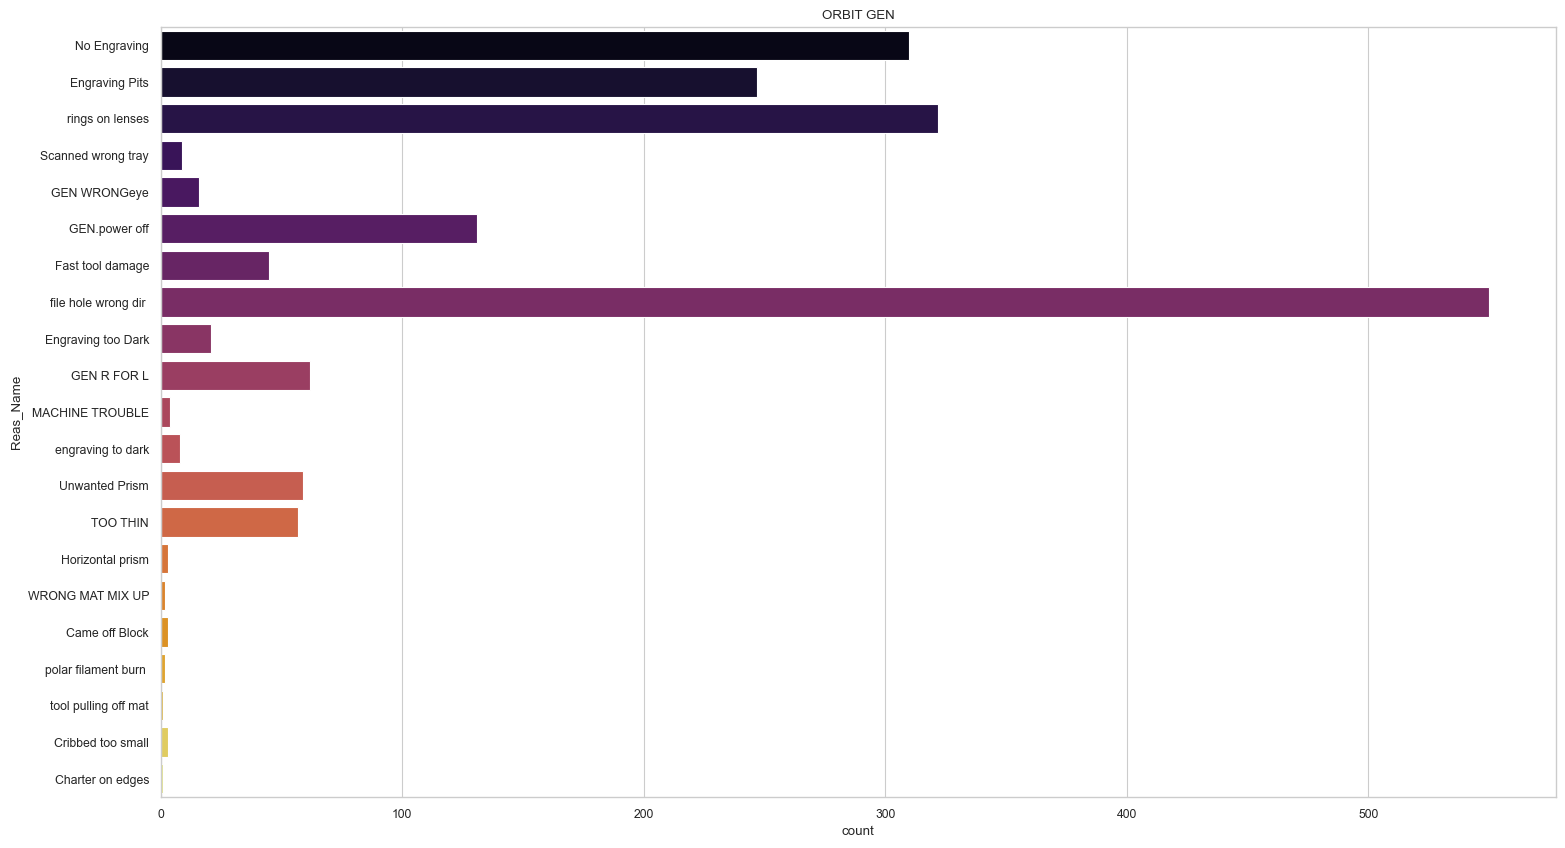

In [48]:
sns.set_context('paper',font_scale=1)
plt.figure(figsize=(18,10))
sns.countplot(y=OG,data=df,palette='inferno')
plt.title('ORBIT GEN')

# **Exploratory analysis: Time**

**After finding the reason and origin for most breakages, we can focus on the time data regarding breakages.**

**To start, we check the data type of the 'Date' column and change it to Datetime if needed.**

In [26]:
type(df['Date'].iloc[0])

numpy.int64

In [27]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df.head()

,Date,Time,Oper_Num,Machine_Num,Machine_Name,Reas_Num,Reas_Name,Eye_Broken,Oper_Machine,Material Desc,LensType Desc,Color Desc,Lens_Cost,User
0,2022-01-04,10354658,1,1,DC,135,Rosin A/R breakage,1,M,TRIVEX,CBW,FACTORY,17.26,JN
1,2022-01-04,10371438,1,1,DC,135,Rosin A/R breakage,2,M,TRIVEX,SV,FACTORY,13.26,JN
2,2022-01-04,10375493,1,1,DC,135,Rosin A/R breakage,1,M,POLY,S,HARDCOAT,4.42,JN
3,2022-01-04,10375493,1,1,DC,135,Rosin A/R breakage,2,M,POLY,S,HARDCOAT,4.42,JN
4,2022-01-04,10425696,1,1,DC,18,wrong trans color,1,M,TRIVEX,CBW,TRANS,7.50,JN


In [28]:
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Let's create variables for day, month, and hour data.**

In [29]:
df['Hour'] = df['Date'].apply(lambda time: time.hour)
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)

In [30]:
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**For a better reading, let's create a dictionary to change numeric values to day names.**

In [31]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
mmap = {0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'Jun',6:'Jul',7:'Aug',8:'Sep',9:'Oct',10:'Nov',11:'Dec'}

In [32]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Month'] = df['Month']

**We check the number of breakages for each month and day.**

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

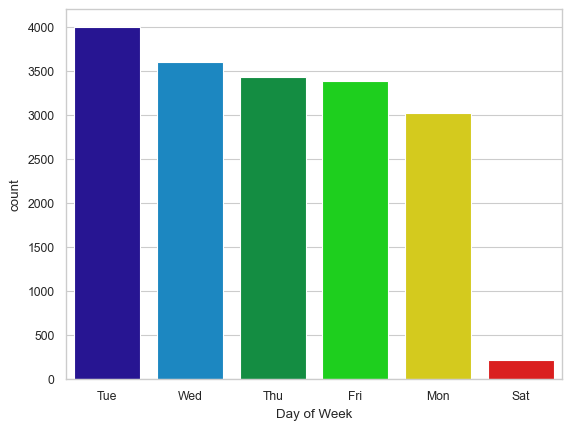

In [49]:
sns.countplot(x='Day of Week',data=df, palette='nipy_spectral')

<AxesSubplot:xlabel='Month', ylabel='count'>

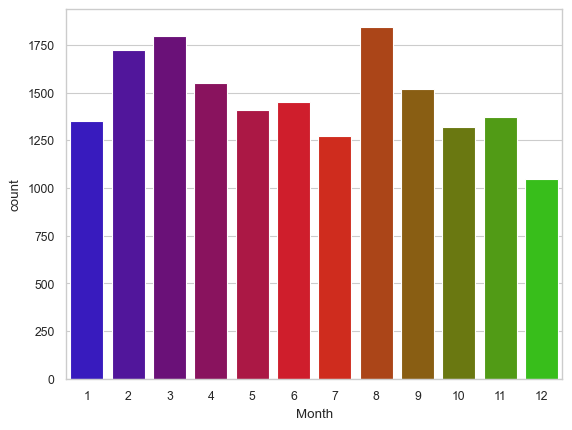

In [51]:
sns.countplot(x='Month',data=df, palette='brg')

In [35]:
byMonth = df.groupby('Month').count()

**This plot shows the amount breakages per month in a linear way**

<AxesSubplot:xlabel='Month'>

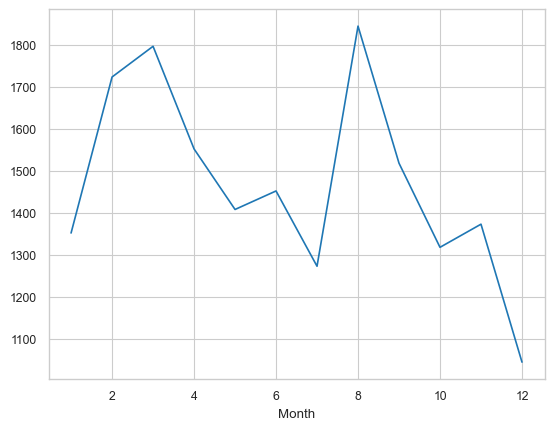

In [36]:
byMonth['User'].plot()

**Let's use a line plot to see if there are any outliers or detect any unusual observations.**

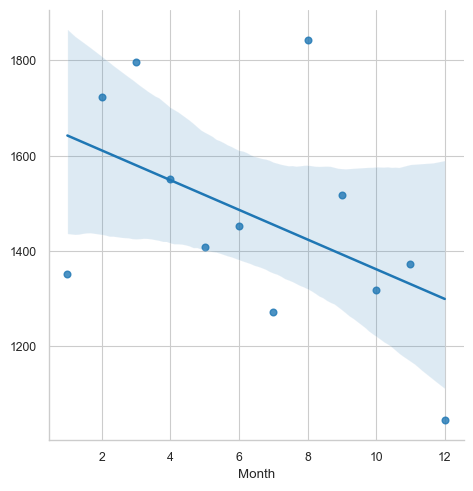

In [37]:
sns.lmplot(x='Month',y='User',data=byMonth.reset_index()).set(ylabel = '')

**Let's create a column based on the breakage occurrences of every month of the year and use it to explore the top breakage origin and also the reasons for most breakage occurrences in general.**

In [38]:
df['Year-Month']=df['Date'].apply(lambda t: t.date())

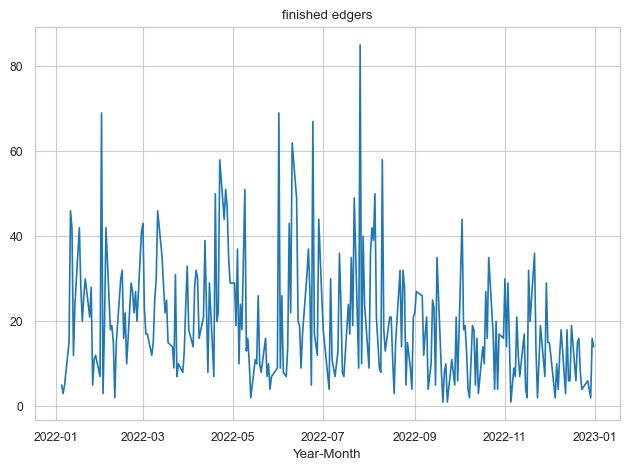

In [39]:
df[df['Machine_Name']=='finished edgers'].groupby('Year-Month').count()['User'].plot()
plt.title('finished edgers')
plt.tight_layout()

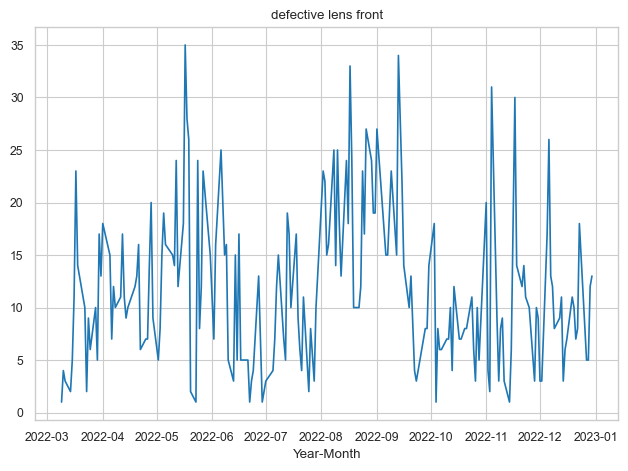

In [40]:
df[df['Reas_Name']=='defective lens front'].groupby('Year-Month').count()['User'].plot()
plt.title('defective lens front')
plt.tight_layout()

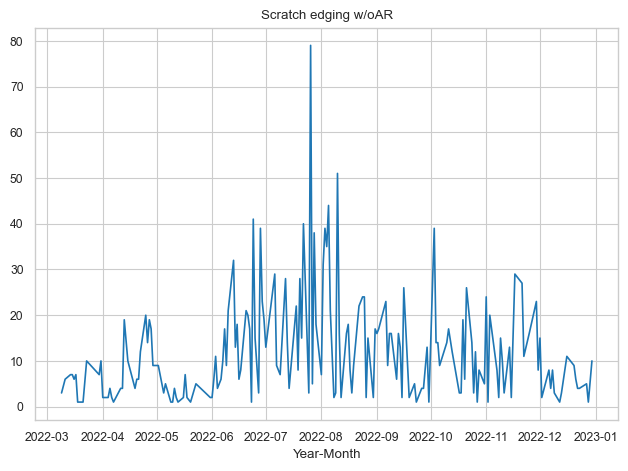

In [41]:
df[df['Reas_Name']=='Scratch edging w/oAR'].groupby('Year-Month').count()['User'].plot()
plt.title('Scratch edging w/oAR')
plt.tight_layout()


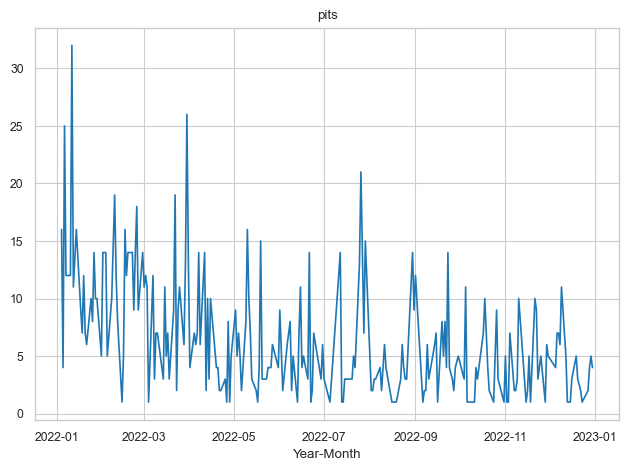

In [42]:
df[df['Reas_Name']=='pits'].groupby('Year-Month').count()['User'].plot()
plt.title('pits')
plt.tight_layout()

**Let's downsize by restructuring the data to examine the number of breakages every day of the week for each month and plot it using a heatmap for a clear presentation.**

In [43]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['User'].unstack()
dayMonth.head(7)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,277.0,334.0,272.0,375.0,172.0,310.0,302.0,253.0,326.0,256.0,229.0,279.0
Mon,233.0,363.0,250.0,234.0,280.0,212.0,171.0,354.0,186.0,333.0,247.0,157.0
Sat,NaN,34.0,NaN,NaN,20.0,25.0,7.0,36.0,45.0,25.0,3.0,16.0
Thu,256.0,371.0,421.0,252.0,274.0,239.0,204.0,307.0,416.0,240.0,242.0,212.0
Tue,319.0,351.0,416.0,393.0,354.0,306.0,386.0,383.0,286.0,228.0,348.0,229.0
Wed,267.0,270.0,437.0,298.0,308.0,360.0,203.0,511.0,259.0,236.0,304.0,152.0


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

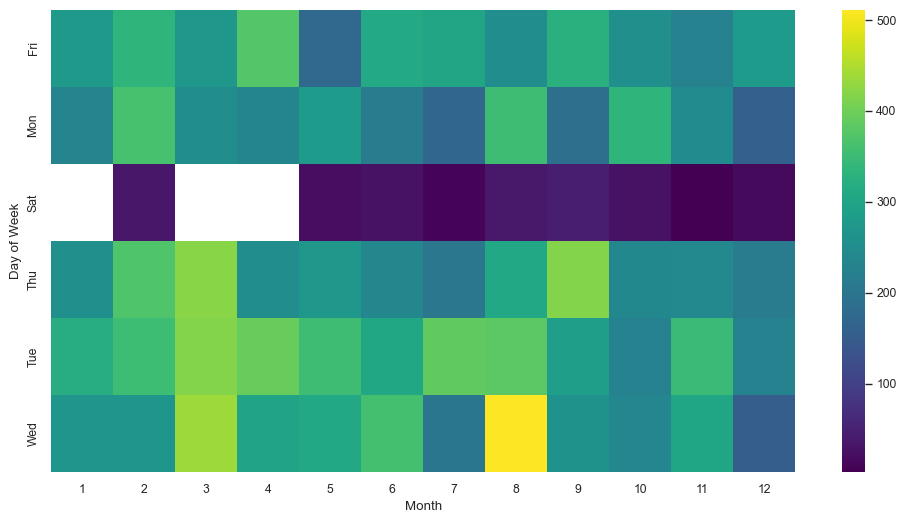

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')